In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("car_purchase_data_200.csv")
data.head(5)

,Age,Income,Marital_Status,Children,Car_Purchased
0,30,Medium,Married,4,No
1,54,High,Married,3,Yes
2,49,Low,Single,3,No
3,39,Low,Married,2,Yes
4,57,Medium,Single,2,No


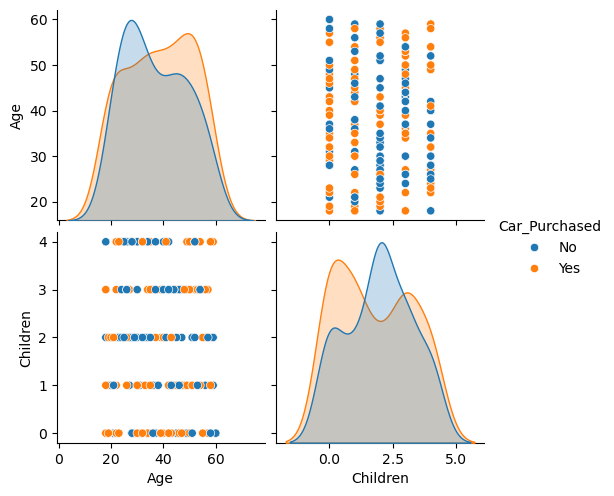

In [4]:
import seaborn as sns
sns.pairplot(data,hue="Car_Purchased")    #for data visualization and get the distribution of data

<Axes: xlabel='Car_Purchased', ylabel='count'>

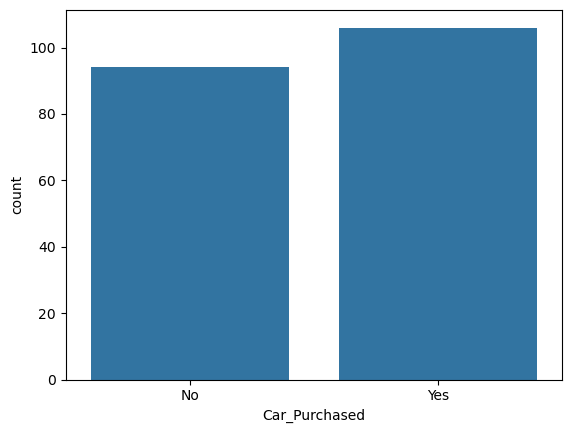

In [6]:
sns.countplot(x='Car_Purchased', data=data)    #get the count oy y valued data / diffrence of y valued data

In [7]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()

#for Income column
encoded_income=model.fit_transform(data['Income'])   #encode string values into numerical values
data['Income']=encoded_income

In [8]:
#for Marital_Status column
encoded_Marital_Status=model.fit_transform(data['Marital_Status'])   #encode string values into numerical values
data['Marital_Status']=encoded_Marital_Status

In [9]:
# Divide data set into X amd y to train and test

x=data.drop('Car_Purchased',axis=1)  #drop the cloumn of get as y from data set then remainnig data set ids allocating to x to training
x.head(5)

,Age,Income,Marital_Status,Children
0,30,2,0,4
1,54,0,0,3
2,49,1,1,3
3,39,1,0,2
4,57,2,1,2


In [10]:
y=data['Car_Purchased']
y.head(5)        #get y value as the precaction value

0     No
1    Yes
2     No
3    Yes
4     No
Name: Car_Purchased, dtype: object

In [11]:
#divide data set into trainning and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [13]:
#select multinomial naive_byes types because there ha several classes in the features 
from sklearn.naive_bayes import MultinomialNB
obj=MultinomialNB()   
obj.fit(x_train,y_train)

MultinomialNB()

In [15]:
pred=obj.predict(x_test)
pred

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No'],
      dtype='<U3')

In [16]:
#considering the performance of the predicted values
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.5666666666666667

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[15,  8],
       [18, 19]], dtype=int64)